In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from mapclassify import Quantiles

# NYC 2010 Census Tract

In [ ]:
Census_Tract_2010_path = '2010 Census Tracts/geo_export_139fc905-b132-4c03-84d5-ae9e70dded42.shp'

NYC_Census_Tract_2010_gdf = gpd.read_file(Census_Tract_2010_path)

In [ ]:
NYC_Census_Tract_gdf_reduced = NYC_Census_Tract_2010_gdf[['ct2010', 'ctlabel', 'boro_code', 'shape_area', 'shape_leng', 'geometry']]

In [ ]:
NYC_Census_Tract_gdf_reduced.ctlabel = NYC_Census_Tract_gdf_reduced.ctlabel.astype('float')

In [ ]:
NYC_Census_Tract_gdf_reduced.rename(columns={'ctlabel':'Census_Tract'},inplace=True)

In [ ]:
NYC_Census_Tract_gdf_reduced.boro_code = NYC_Census_Tract_gdf_reduced.boro_code.astype('int64')

In [ ]:
NYC_Census_Tract_gdf_reduced.plot(figsize=(10,10))

In [ ]:
#FINAL TABLE - 2010 NYC Shapefile
NYC_Census_Tract_final_gdf = NYC_Census_Tract_gdf_reduced

In [ ]:
#ACS Demographic and Housing Estimates - Reading csv files

ACS_Demographic_and_Housing_2010_table_path = 'ACS_Demographics_and_Housing_Estimates/ACSDP5Y2010.DP05_data_with_overlays_2021-11-17T002059.csv'
ACS_Demographic_and_Housing_2019_table_path = 'ACS_Demographics_and_Housing_Estimates/ACSDP5Y2019.DP05_data_with_overlays_2021-11-17T002059.csv'

ACS_Demographic_and_Housing_2010_df = pd.read_csv(ACS_Demographic_and_Housing_2010_table_path, low_memory = False)
ACS_Demographic_and_Housing_2019_df = pd.read_csv(ACS_Demographic_and_Housing_2019_table_path, low_memory = False)

In [ ]:
ACS_Demographic_and_Housing_2019_df[['DP05_0001E','DP05_0070E']]

# ACS Demographics

Columns : ACS Demographic Table - 2010

- NAME : Census Tract Name
- DP05_0001E : Total Population
- DP05_0009E : Total Population between 25-34 yrs
- DP05_0017E : Median Age
- DP05_0032E : Population of White Only
- DP05_0033E : Population of African American Only
- DP05_0039E : Population of Asian Only
- DP05_0065E : Population of Hispanic or Latino

Columns : ACS Demographic Table - 2019

- NAME : Census Tract Name
- DP05_0001E : Total Population
- DP05_0010E : Total Population between 25-34 yrs
- DP05_0018E : Median Age
- DP05_0037E : Population of White Only
- DP05_0038E : Population of African American Only
- DP05_0044E : Population of Asian Only
- DP05_0070E : Population of Hispanic or Latino

In [ ]:
ACS_Demographic_and_Housing_interested_columns_2010 = ['NAME','DP05_0001E','DP05_0009E','DP05_0017E','DP05_0032E','DP05_0033E','DP05_0039E','DP05_0067E']
ACS_Demographic_and_Housing_interested_columns_2019 = ['NAME','DP05_0001E','DP05_0010E','DP05_0018E','DP05_0037E','DP05_0038E','DP05_0044E','DP05_0072E']

In [ ]:
ACS_Demographic_and_Housing_2010_df_reduced = ACS_Demographic_and_Housing_2010_df[ACS_Demographic_and_Housing_interested_columns_2010]
ACS_Demographic_and_Housing_2019_df_reduced = ACS_Demographic_and_Housing_2019_df[ACS_Demographic_and_Housing_interested_columns_2019]

In [ ]:
#Renaming Columns
ACS_Demographic_and_Housing_2010_df_reduced.rename(columns={'DP05_0001E':'Total_Population',\
    'DP05_0009E':'Total_Population_25_to_34_yrs','DP05_0017E':'Median_Age',\
    'DP05_0032E':'Pop_White','DP05_0033E':'Pop_African_American','DP05_0039E':'Pop_Asian',\
    'DP05_0067E':'Pop_Hispanic'},inplace=True)
ACS_Demographic_and_Housing_2019_df_reduced.rename(columns={'DP05_0001E':'Total_Population',\
    'DP05_0010E':'Total_Population_25_to_34_yrs','DP05_0018E':'Median_Age',\
    'DP05_0037E':'Pop_White','DP05_0038E':'Pop_African_American','DP05_0044E':'Pop_Asian',\
    'DP05_0072E':'Pop_Hispanic'},inplace=True)

#Splitting NAME to Census_tract, County and State
ACS_Demographic_and_Housing_2010_df_reduced[['Census_Tract','County','State']] = ACS_Demographic_and_Housing_2010_df_reduced['NAME'].str.split(',',expand=True)
ACS_Demographic_and_Housing_2019_df_reduced[['Census_Tract','County','State']] = ACS_Demographic_and_Housing_2019_df_reduced['NAME'].str.split(',',expand=True)

#Retaining only numbers in the Census tract column
ACS_Demographic_and_Housing_2010_df_reduced.Census_Tract = ACS_Demographic_and_Housing_2010_df_reduced.Census_Tract.str.replace(r'[a-zA-Z]','')
ACS_Demographic_and_Housing_2019_df_reduced.Census_Tract = ACS_Demographic_and_Housing_2019_df_reduced.Census_Tract.str.replace(r'[a-zA-Z]','')

#Remove leading and trailing spaces in census tract column
ACS_Demographic_and_Housing_2019_df_reduced.Census_Tract = list(map(lambda x : x.replace(" ",""),ACS_Demographic_and_Housing_2019_df_reduced.Census_Tract))
ACS_Demographic_and_Housing_2010_df_reduced.Census_Tract = list(map(lambda x : x.replace(" ",""),ACS_Demographic_and_Housing_2010_df_reduced.Census_Tract))

In [ ]:
ACS_Demographic_and_Housing_2019_df_reduced

In [ ]:
nyc_counties = [' Kings County', ' New York County', ' Queens County', ' Bronx County', ' Richmond County']

demog10 = ACS_Demographic_and_Housing_2010_df_reduced[ACS_Demographic_and_Housing_2010_df_reduced['County'].isin(nyc_counties)]
demog19 = ACS_Demographic_and_Housing_2019_df_reduced[ACS_Demographic_and_Housing_2019_df_reduced['County'].isin(nyc_counties)]

In [ ]:
# 1 = Manhattan. New York County
# 2 = Bronx. Bronx County
# 3 = Brooklyn. Kings County
# 4 = Queens. Queens County
# 5 = Staten Island. Richmond County

demog10.County.replace({' New York County' : 1, " Bronx County": 2, " Kings County": 3, " Queens County": 4, " Richmond County": 5}, inplace=True)
demog19.County.replace({' New York County' : 1, " Bronx County": 2, " Kings County": 3, " Queens County": 4, " Richmond County": 5}, inplace=True)

In [ ]:
demog10 = demog10.rename(columns={"County": "boro_code"})
demog19 = demog19.rename(columns={"County": "boro_code"})

In [ ]:
demog10.Census_Tract = demog10.Census_Tract.astype('float')
demog19.Census_Tract = demog19.Census_Tract.astype('float')

In [ ]:
ACS_Demographic_and_Housing_2010_final_df = demog10
ACS_Demographic_and_Housing_2019_final_df = demog19

# Joining Tables

In [ ]:
# 2: Population and Demographic data 2010 (with some extra cleaning)
pop10 = ACS_Demographic_and_Housing_2010_final_df[1:].drop(columns=['NAME', 'State'])
pop10

In [ ]:
# merge tracts (1) with 2010 population data (2)
_pop = pd.merge(NYC_Census_Tract_final_gdf, pop10, left_on = ['Census_Tract','boro_code'], right_on =['Census_Tract','boro_code'])
_pop

In [ ]:
_pop.isna().any()

In [ ]:
g2010 = _pop

In [ ]:
# 2: Population and Demographic data 2010 (with some extra cleaning)
pop19 = ACS_Demographic_and_Housing_2019_final_df[1:].drop(columns=['NAME', 'State'])
pop19

In [ ]:
# merge tracts (1) with 2010 population data (2)
_pop19 = pd.merge(NYC_Census_Tract_final_gdf, pop19, left_on = ['Census_Tract','boro_code'], right_on =['Census_Tract','boro_code'])
_pop19

In [ ]:
g2019 = _pop19

---
# Save Datasets
---

In [ ]:
#save tables to csv files
g2010.to_csv('pop_g2010.csv')
g2019.to_csv('pop_g2019.csv')

---
# Plotting
---

In [ ]:
g2010.columns

In [ ]:
#Read CSV files
g2010 = pd.read_csv('pop_g2010.csv')
g2019 = pd.read_csv('pop_g2019.csv')

#Create Copy
g2010_df = g2010.copy()
g2019_df = g2019.copy()

In [ ]:
#Set geometries

g2010_df['geometry'] = gpd.GeoSeries.from_wkt(g2010_df['geometry'])
gdf_2010 = gpd.GeoDataFrame(g2010_df,geometry="geometry")

g2019_df['geometry'] = gpd.GeoSeries.from_wkt(g2019_df['geometry'])
gdf_2019 = gpd.GeoDataFrame(g2019_df,geometry="geometry")

In [ ]:
g2010_df.columns

### CMAP Values
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
gdf_2010.plot(column='Total_Population',ax=ax,legend=True,cmap='winter',\
    scheme='quantiles')
plt.title('2010 - Total Population')

In [ ]:
g2010.columns

---

---

# Plot Comparison (2019-2010)

In [ ]:
gdf_2019['Pop_diff_White'] = gdf_2019['Pop_White']-gdf_2010['Pop_White']
gdf_2019['Pop_diff_Black'] = gdf_2019['Pop_African_American']-gdf_2010['Pop_African_American']
gdf_2019['Pop_diff_Asian'] = gdf_2019['Pop_Asian']-gdf_2010['Pop_Asian']
gdf_2019['Pop_diff_Hispanic'] = gdf_2019['Pop_Hispanic']-gdf_2010['Pop_Hispanic']

# White

In [ ]:
#setting all -ve values to 0
gdf_2019['Pop_diff_White'][gdf_2019['Pop_diff_White'] < 0] = 0

#setting all values < mean to 0 [looking for neighbourhoods which saw a greater increase in pop compared to avg]
gdf_2019['Pop_diff_White'][gdf_2019['Pop_diff_White'] < gdf_2019['Pop_diff_White'].mean()] = 0

(-74.28337047811617,
 -73.67222994890714,
 40.475144526098404,
 40.936503646095986)

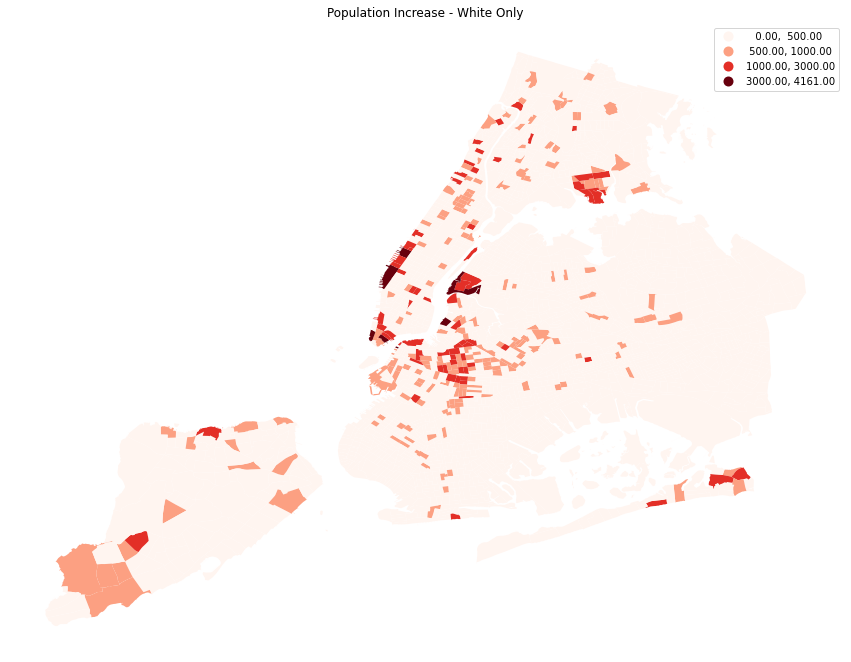

In [108]:
fig,ax = plt.subplots(figsize=(15,15))

ax =gdf_2019.plot(column='Pop_diff_White',ax=ax,legend=True,cmap='Reds',\
    scheme='user_defined', classification_kwds={'bins':[500, 1000, 3000]})
ax.title.set_text('Population Increase - White Only')
ax.axis('off')

# African American, Asian and Hispanic - Plotting Tracts with have seen stark changes in Population

In [ ]:
#setting all +ve values to 0
gdf_2019['Pop_diff_Black'][gdf_2019['Pop_diff_Black'] > 0] = 0

#setting all values > mean to 0 [looking for neighbourhoods which saw a greater decrease in pop compared to avg]
gdf_2019['Pop_diff_Black'][gdf_2019['Pop_diff_Black'] > gdf_2019['Pop_diff_Black'].mean()] = 0

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))

ax =gdf_2019.plot(column='Pop_diff_Black',ax=ax,legend=True,cmap='Reds_r',\
    scheme='user_defined', classification_kwds={'bins':[-1000, -500, -200]})
ax.title.set_text('Population Decrease - Black Only')
ax.axis('off')

In [ ]:
#setting all +ve values to 0
gdf_2019['Pop_diff_Asian'][gdf_2019['Pop_diff_Asian'] > 0] = 0

#setting all values > mean to 0 [looking for neighbourhoods which saw a greater decrease in pop compared to avg]
gdf_2019['Pop_diff_Asian'][gdf_2019['Pop_diff_Asian'] > gdf_2019['Pop_diff_Asian'].mean()] = 0

In [ ]:

fig,ax = plt.subplots(figsize=(15,15))

ax =gdf_2019.plot(column='Pop_diff_Asian',ax=ax,legend=True,cmap='Reds_r',\
    scheme='user_defined', classification_kwds={'bins':[-1000, -500, -200]})
ax.title.set_text('Population Decrease - Asian Only')
ax.axis('off')

In [ ]:
#setting all +ve values to 0
gdf_2019['Pop_diff_Hispanic'][gdf_2019['Pop_diff_Hispanic'] > 0] = 0

#setting all values > mean to 0 [looking for neighbourhoods which saw a greater Decrease in pop compared to avg]
gdf_2019['Pop_diff_Hispanic'][gdf_2019['Pop_diff_Hispanic'] > gdf_2019['Pop_diff_Hispanic'].mean()] = 0

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))

ax =gdf_2019.plot(column='Pop_diff_Hispanic',ax=ax,legend=True,cmap='Reds_r',\
    scheme='user_defined', classification_kwds={'bins':[-1000, -500, -200,]})
ax.title.set_text('Population Decrease - Hispanic Only')
ax.axis('off')

----

# Looking at relationship between African American and White population

In [107]:
# get tracts which saw a greater than 500 reducation in Black population

tract_redu_black_index = (gdf_2019[gdf_2019['Pop_diff_Black'] < -500]).index

In [112]:
# get tracts which saw a greater than 500 Increase in White population
tract_inc_white_index = (gdf_2019[gdf_2019['Pop_diff_White'] > 500]).index

In [145]:
len(tract_redu_black_index), len(tract_inc_white_index)

(116, 267)

In [151]:
gen_tracts_index = [v for v in tract_redu_black_index if v in tract_inc_white_index]

In [153]:
len(gen_tracts_index)

48

In [114]:
gdf_2019.columns

Index(['Unnamed: 0', 'ct2010', 'Census_Tract', 'boro_code', 'shape_area',
       'shape_leng', 'geometry', 'Total_Population',
       'Total_Population_25_to_34_yrs', 'Median_Age', 'Pop_White',
       'Pop_African_American', 'Pop_Asian', 'Pop_Hispanic', 'Pop_diff_White',
       'Pop_diff_Black', 'Pop_diff_Asian', 'Pop_diff_Hispanic'],
      dtype='object')

In [119]:
tract_redu_black_index = np.asarray(tract_redu_black_index)
tract_inc_white_index = np.asarray(tract_inc_white_index)

## Get population snapshots of 2010 and 2019

In [155]:
#Gen tract
gen_tracts = []
for i in range(len(gen_tracts_index)):
    gen_tracts.append(gdf_2010['Census_Tract'].iloc[gen_tracts_index[i]])

#2010
Tract_black_pop_2010 = []
for i in range(len(gen_tracts_index)):
    Tract_black_pop_2010.append(gdf_2010['Pop_African_American'].iloc[gen_tracts_index[i]])
    

Tract_white_pop_2010 = []
for i in range(len(gen_tracts_index)):
    Tract_white_pop_2010.append(gdf_2010['Pop_White'].iloc[gen_tracts_index[i]])

#2019
Tract_black_pop_2019 = []
for i in range(len(gen_tracts_index)):
    Tract_black_pop_2019.append(gdf_2019['Pop_African_American'].iloc[gen_tracts_index[i]])

Tract_white_pop_2019 = []
for i in range(len(gen_tracts_index)):
    Tract_white_pop_2019.append(gdf_2019['Pop_White'].iloc[gen_tracts_index[i]])

In [157]:
df_pop_change = pd.DataFrame({'Tract':gen_tracts , 'POP_2010_black':Tract_black_pop_2010,\
    'POP_2019_black':Tract_black_pop_2019, 'POP_2010_white':Tract_white_pop_2010,'POP_2019_white':Tract_white_pop_2019})


In [167]:
df_pop_change = df_pop_change.astype(float)

In [183]:
plt.rcParams["figure.figsize"] = [12, 12]

Text(0, 0.5, 'Population')

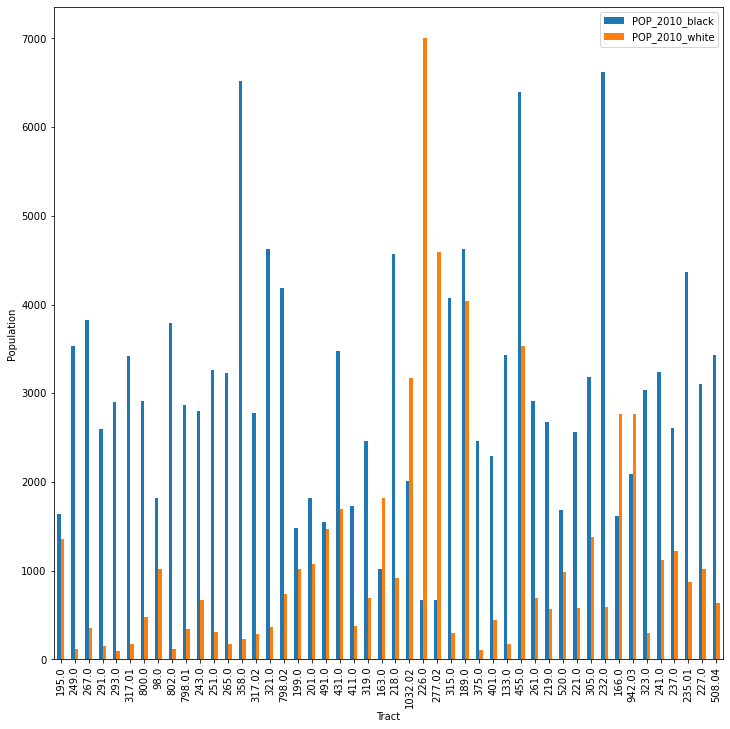

In [190]:
df_pop_change[['Tract','POP_2010_black','POP_2010_white']].plot(x='Tract',kind='bar',stacked = False)
plt.ylabel('Population')

Text(0, 0.5, 'Population')

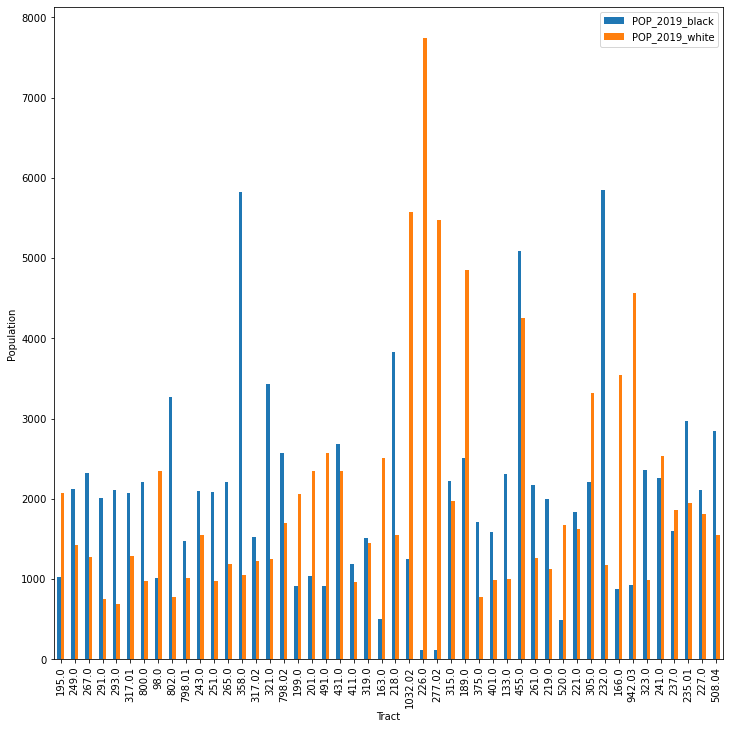

In [192]:
df_pop_change[['Tract','POP_2019_black','POP_2019_white']].plot(x='Tract',kind='bar',stacked = False)
plt.ylabel('Population')

In [205]:
#Mean population in 2010 white
df_pop_change['POP_2010_white'].mean()

1142.5625

In [206]:
#Mean population in 2019 white
df_pop_change['POP_2019_white'].mean()

2061.5833333333335

In [207]:
#Mean population in 2010 black
df_pop_change['POP_2010_black'].mean()

3012.375

In [208]:
#Mean population in 2019 black
df_pop_change['POP_2019_black'].mean()

2069.7916666666665

In [199]:
from scipy import stats

In [201]:
stats.pearsonr(df_pop_change['POP_2010_black'], df_pop_change['POP_2010_white'])

(-0.28096847491170807, 0.05305647745837328)

In [202]:
stats.pearsonr(df_pop_change['POP_2019_black'], df_pop_change['POP_2019_white'])

(-0.31687176147435736, 0.028208533751934176)

----

# Plotting Population (2019 & 2010)

In [ ]:
"""fig,ax = plt.subplots(figsize=(15,15))

ax =gdf_2010.plot(column='Pop_White',ax=ax,legend=False,cmap='Reds',\
    scheme='quantiles')
ax.title.set_text('2010 - Total Population - White Only')
ax.axis('off')

fig,ax = plt.subplots(figsize=(11,11))
ax = gdf_2010.plot(column='Pop_African_American',ax=ax,legend=False,cmap='Reds',\
    scheme='quantiles')
ax.title.set_text('2010 - Total Population - African American Only')
ax.axis('off')

fig,ax = plt.subplots(figsize=(11,11))
ax = gdf_2010.plot(column='Pop_Asian',ax=ax,legend=False,cmap='Reds',\
    scheme='quantiles')
ax.title.set_text('2010 - Total Population - Asian Only')
ax.axis('off')


#2019 Plots

fig,ax = plt.subplots(figsize=(15,15))

ax =gdf_2019.plot(column='Pop_White',ax=ax,legend=False,cmap='Reds',\
    scheme='quantiles')
ax.title.set_text('2019 - Total Population - White Only')
ax.axis('off')

fig,ax = plt.subplots(figsize=(11,11))
ax = gdf_2019.plot(column='Pop_African_American',ax=ax,legend=False,cmap='Reds',\
    scheme='quantiles')
ax.title.set_text('2019 - Total Population - African American Only')
ax.axis('off')

fig,ax = plt.subplots(figsize=(11,11))
ax = gdf_2019.plot(column='Pop_Asian',ax=ax,legend=False,cmap='Reds',\
    scheme='quantiles')
ax.title.set_text('2019 - Total Population - Asian Only')
ax.axis('off')

fig,ax = plt.subplots(figsize=(15,15))

ax = gdf_2019.plot(column='Pop_Hispanic',ax=ax,legend=True,cmap='winter',\
    scheme='quantiles')
ax.title.set_text('2019 - Total Population - Hispanic Only')
ax.axis('off')

fig,ax = plt.subplots(figsize=(15,15))

ax = gdf_2010.plot(column='Pop_Hispanic',ax=ax,legend=True,cmap='winter',\
    scheme='quantiles')
ax.title.set_text('2010 - Total Population - Hispanic Only')
ax.axis('off')"""